In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.layers import AveragePooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import f1_score, r2_score

# **Load Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_val, y_val = x_train[50000:60000,:], y_train[50000:60000]
x_train, y_train = x_train[:50000,:], y_train[:50000]
print(x_train.shape)
print(y_train.shape)

# **Loading image**

In [ ]:
i = 9
image = x_train[i]
label = y_train[i]

plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.show()

# **Reshape dataset**

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_val= x_val.reshape(x_val.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

# **One hot encoding**

In [ ]:
# y_train[0]

In [ ]:
y_train = np_utils.to_categorical(y_train,10)
y_val = np_utils.to_categorical(y_val,10)
y_test = np_utils.to_categorical(y_test,10)
# y_train[0]

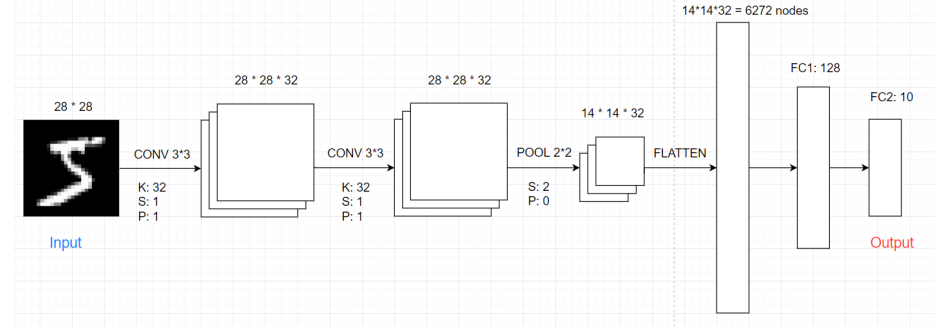

# **Create model**

In [ ]:
model = Sequential()
# Add the Convolution Layer: 32 kernels, kernel size: 3x3
# Using activation: sigmoid and target input shape: 28x28x1
model.add(Conv2D(32, (3,3), activation='sigmoid',padding = "same", input_shape=(28,28,1)))
# Add the Convolution Layer
model.add(Conv2D(32, (3,3), activation='sigmoid'))
# Add the Max pooling Layer: take the features
model.add(MaxPooling2D(pool_size=(2,2)))
# Add the Flatten Layer: convert tensor to vector
model.add(Flatten())
# Add the Fully Connected Layer: 128 nodes, activation: sigmoid
model.add(Dense(128, activation='sigmoid'))
# Add the output layer with 10 nodes, activation: softmax to switch to probability
model.add(Dense(10, activation='softmax'))
model.summary()

# **Compile model**
* loss: categorical crossentropy
* optimizer: adam

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# **Training model**

In [ ]:
H = model.fit(x_train, y_train, 
              validation_data=(x_val, y_val),
             batch_size=32, epochs = 19,
             verbose=1)

# **Evaluate model**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {score[0]}, Accuracy; {score[1]}")

In [ ]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize = (14,5))
plt.grid(True)
plt.gca().set_ylim(0 , 1)

# **Prediction**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
y_pre = model.predict(x_test)
y_pre = np.round(y_pre)
report = classification_report(y_test, y_pre)
print(report)